# Question 1

# Part 1
## Principal Component Analysis (PCA)

In [65]:
import pandas as pd
import numpy as np
import sys
import math

csv_path = 'intrusion_detection/data.csv'#raw_input("Enter path to input CSV file: ")
dataset = pd.read_csv(csv_path)

# dataset = dataset.dropna(axis=1, how='all')

#split data into train data and validation data
# splitted = np.split(dataset, [int(.8 * len(dataset.index))])
# train_data = splitted[0].reset_index()
# validation_data = splitted[1].reset_index()

dataset.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


In [66]:
attributes = dataset.keys()[0:29]
label = dataset.keys()[29]

In [67]:
mean = {}
std = {}
for x in attributes:
    mean[x] = np.mean(dataset[x])
    std[x] = np.std(dataset[x])
#     print (x,mean[x])

In [68]:
normalized_dataset = dataset
for x in attributes:
    normalized_dataset[x] = (normalized_dataset[x] - mean[x]) / std[x]

X = np.array(normalized_dataset[attributes])
X_T = X.T

covar = np.cov(X_T)

eig_val, eig_vec = np.linalg.eig(covar)

In [69]:
eig_pair = []
for i in range(len(eig_val)):
    pair = [eig_val[i].real, eig_vec[i].real]
    eig_pair.append(pair)
    
from operator import itemgetter
sorted_pair = sorted(eig_pair, key=itemgetter(0), reverse=True)

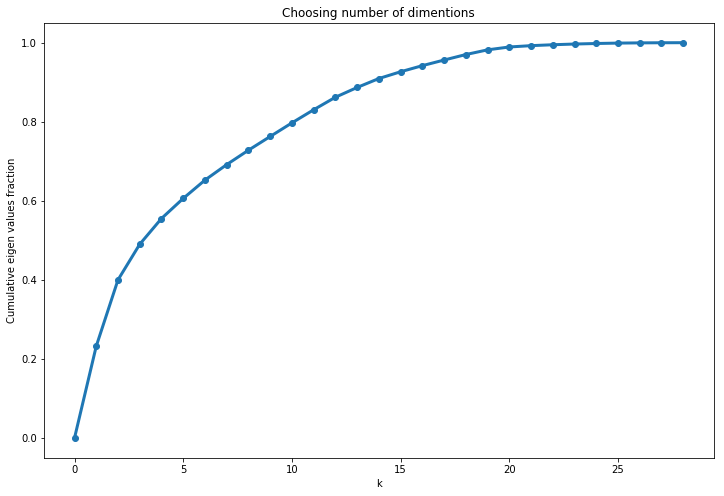

In [70]:
from matplotlib import pyplot as plt

eig_val_cum = []
K = []
cum = 0
for i in range(len(sorted_pair)):
    eig_val_cum.append(cum)
    cum += sorted_pair[i][0]
    K.append(i)

for i in range(len(eig_val_cum)):
    eig_val_cum[i] /= eig_val_cum[len(eig_val_cum)-1]
    
plt.figure(figsize=(12,8))
plt.plot(K, eig_val_cum,  marker='o', linewidth = 3)
plt.xlabel('k')
plt.ylabel('Cumulative eigen values fraction')
plt.title('Choosing number of dimentions')
plt.show()

In [71]:
k = 0
for i in K:
    if eig_val_cum[i] > 0.9:
        k = i
        break
        
print('Number of dimentions after applying PCA: '+str(k))
        
V = []
for i in range(k):
    V.append(np.array(sorted_pair[i][1]))
V = np.array(V)

reduced_X = np.matmul(V,X_T).T

Number of dimentions after applying PCA: 14


In [72]:
# #split data into train data and validation data
# splitted_X = np.split(reduced_X, [int(.8 * len(reduced_X))])
# train_data_X = splitted_X[0]
# validation_data_X = splitted_X[1]

# splitted_Y = np.split(dataset[label], [int(.8 * len(dataset[label]))])
# train_data_Y = splitted_Y[0]
# validation_data_Y = splitted_Y[1]

train_data_X = reduced_X
train_data_Y = dataset[label]

# Part 2
## K-means Clustering

iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...
iterating...


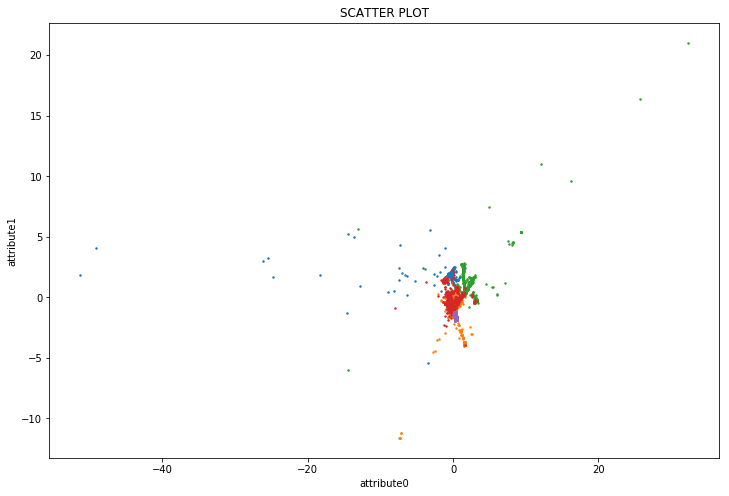

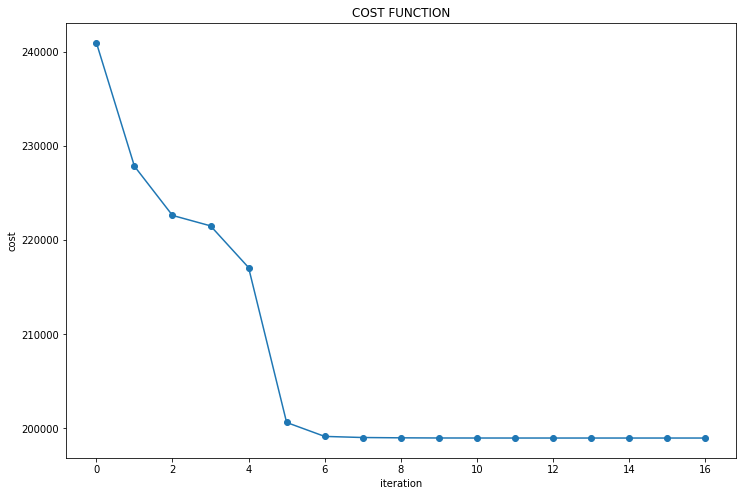

[[   0 6926]
 [   1 7622]
 [   2 2653]
 [   3 6766]
 [   4 1031]]


In [73]:
k = 5 #for k-means clustering

X = np.array(train_data_X)
d = X.shape[1]

# unique, counts = np.unique(train_data_Y, return_counts=True)
# print(np.asarray((unique, counts)).T)
# unique, counts = np.unique(X[:,1], return_counts=True)
# print(np.asarray((unique, counts)).T)

def choose_k_centers():
    centers = np.zeros([k,d])
    for i in range(len(centers)):
        rndm = np.random.randint(len(X))
        centers[i] = X[rndm]
    return centers


def nearest(x, centers):
    min_dist = sys.float_info.max
    closest = -1
    for i in range(len(centers)):
        dist = np.sum( (x - centers[i])**2 )
        if dist < min_dist:
            min_dist = dist
            closest = i
    return closest

c = np.zeros(len(X))
c = c.astype(int)

def kmeans_cluster():
    
    centers = choose_k_centers()
    
    stop = False
    
    cost_arr = []
    
    while True:
        print('iterating...')
        
        stop = True
        for i in range(len(X)):
            prev = c[i]
            c[i] = nearest(X[i], centers)
            if c[i] != prev:
                stop = False
                
        if stop:
            break

        for cluster in range(len(centers)):
            temp = np.zeros(d)
            count = 0
            for i in range(len(X)):
                if c[i] == cluster:
                    temp = temp + X[i]
                    count += 1
#             if count != 0:
            temp = temp / count
            centers[cluster] = temp
            
        cost = 0.0
        for i in range(len(X)):
            cost += np.sum( (X[i]-centers[c[i]])**2 )
        cost_arr.append(cost)
           
#     colors = ['red', 'blue', 'green', 'pink', 'black']
    plt.figure(figsize=(12,8))
    for i in range(k):
        x = []
        y = []
        for j in range(len(X)):
            if c[j] == i:
                x.append(X[j][0])
                y.append(X[j][1])
        plt.scatter(x, y, s=2)
        
    plt.xlabel('attribute0')
    plt.ylabel('attribute1')
    plt.title('SCATTER PLOT')
    plt.show()
    
    plt.figure(figsize=(12,8))
    plt.plot(range(len(cost_arr)), cost_arr, marker ='o')
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.title('COST FUNCTION')
    plt.show()
        
    unique, counts = np.unique(c, return_counts=True)
    print(np.asarray((unique, counts)).T)
        
        
kmeans_cluster()

Count of actual data values in each cluster formed:
['dos' 'normal' 'probe' 'r2l'] [6790   44   91    1]
['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 416 6813  320   70    3]
['dos' 'normal' 'probe' 'r2l'] [1364  300  976   13]
['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 105 5615  926  113    7]
['dos' 'normal'] [439 592]

Purity of each cluster:
[0.9803638463759746, 0.8938598792967725, 0.5141349415755748, 0.829884717706178, 0.574199806013579]


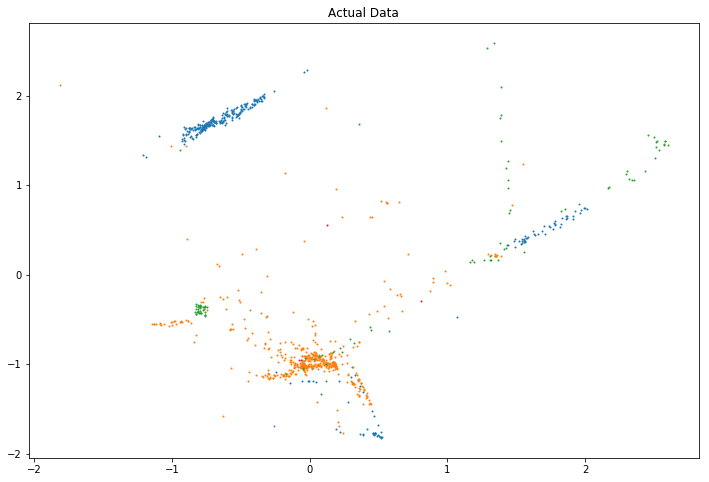

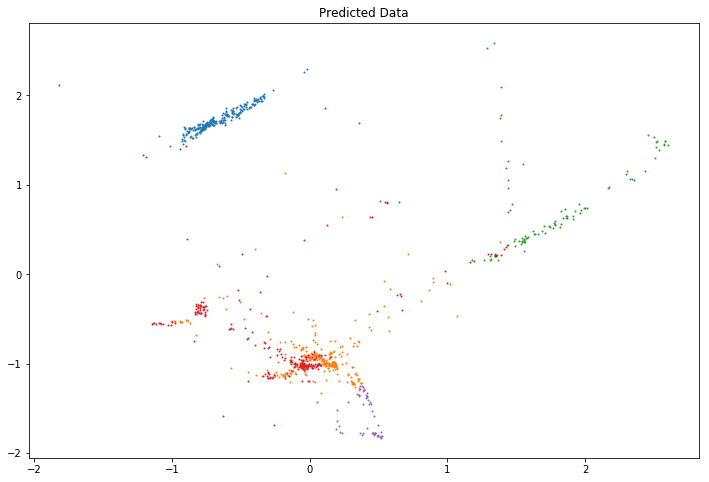

In [74]:
class_mapping = []
purity = []
print('Count of actual data values in each cluster formed:')
for i in range(k):
    indexes = []
    for j in range(len(X)):
        if c[j] == i:
            indexes.append(j)
    actual = train_data_Y[indexes]
    actual = np.array(actual)
    unique, counts = np.unique(actual, return_counts=True)
    print unique, counts
    max_count = 0
    majority_index = 0
    for m in range(len(counts)):
        if counts[m] > max_count:
            max_count = counts[m]
            majority_index = m
    class_mapping.append( unique[majority_index] )
    purity.append( float(max_count)/len(indexes) )
    
print('\nPurity of each cluster:')
print (purity)
Kmeans_avg_purity = float(np.mean(purity))
# for i in range(len(X)):
#     print class_mapping[c[i]], train_data_Y[i]

plt.figure(figsize=(12,8))
for i in np.unique(train_data_Y):
    x = []
    y = []
    for j in range(1000):
        if train_data_Y[j] == i:
            if X[j][0] < 3 and X[j][0] > -2 and X[j][1] < 4 and X[j][1] > -3:
                x.append(X[j][0])
                y.append(X[j][1])
    plt.scatter(x, y, s=1)
plt.title('Actual Data')
plt.show()

plt.figure(figsize=(12,8))
for i in range(k):
    x = []
    y = []
    for j in range(1000):
        if c[j] == i:
            if X[j][0] < 3 and X[j][0] > -2 and X[j][1] < 4 and X[j][1] > -3:
                x.append(X[j][0])
                y.append(X[j][1])
    plt.scatter(x, y, s=1)
plt.title('Predicted Data')
plt.show()

# Part 3
## Gaussian Mixture Model Classifier

In [75]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(train_data_X)
# dataset = np.array(dataset[attributes])
# dataset = dataset
labels = gmm.predict(train_data_X)
# for i in range(len(labels)):
#     print labels[i], train_data_Y[i]

class_mapping = []
purity = []
print('Count of actual data values in each cluster formed:')
for i in range(k):
    indexes = []
    for j in range(len(X)):
        if labels[j] == i:
            indexes.append(j)
    actual = train_data_Y[indexes]
    actual = np.array(actual)
    unique, counts = np.unique(actual, return_counts=True)
    print unique, counts
    max_count = 0
    majority_index = 0
    for m in range(len(counts)):
        if counts[m] > max_count:
            max_count = counts[m]
            majority_index = m
    class_mapping.append( unique[majority_index] )
    purity.append( float(max_count)/len(indexes) )
print('\nPurity of each cluster:')
print purity
GMM_avg_purity = float(np.mean(purity))

Count of actual data values in each cluster formed:
['dos'] [7505]
['normal'] [8]
['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 942 3763 2214  145    7]
['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 667 9593   98   52    3]
['probe'] [1]

Purity of each cluster:
[1.0, 1.0, 0.5321736670909348, 0.9212522808028426, 1.0]


# Part 4
## Hierarchical Clustering

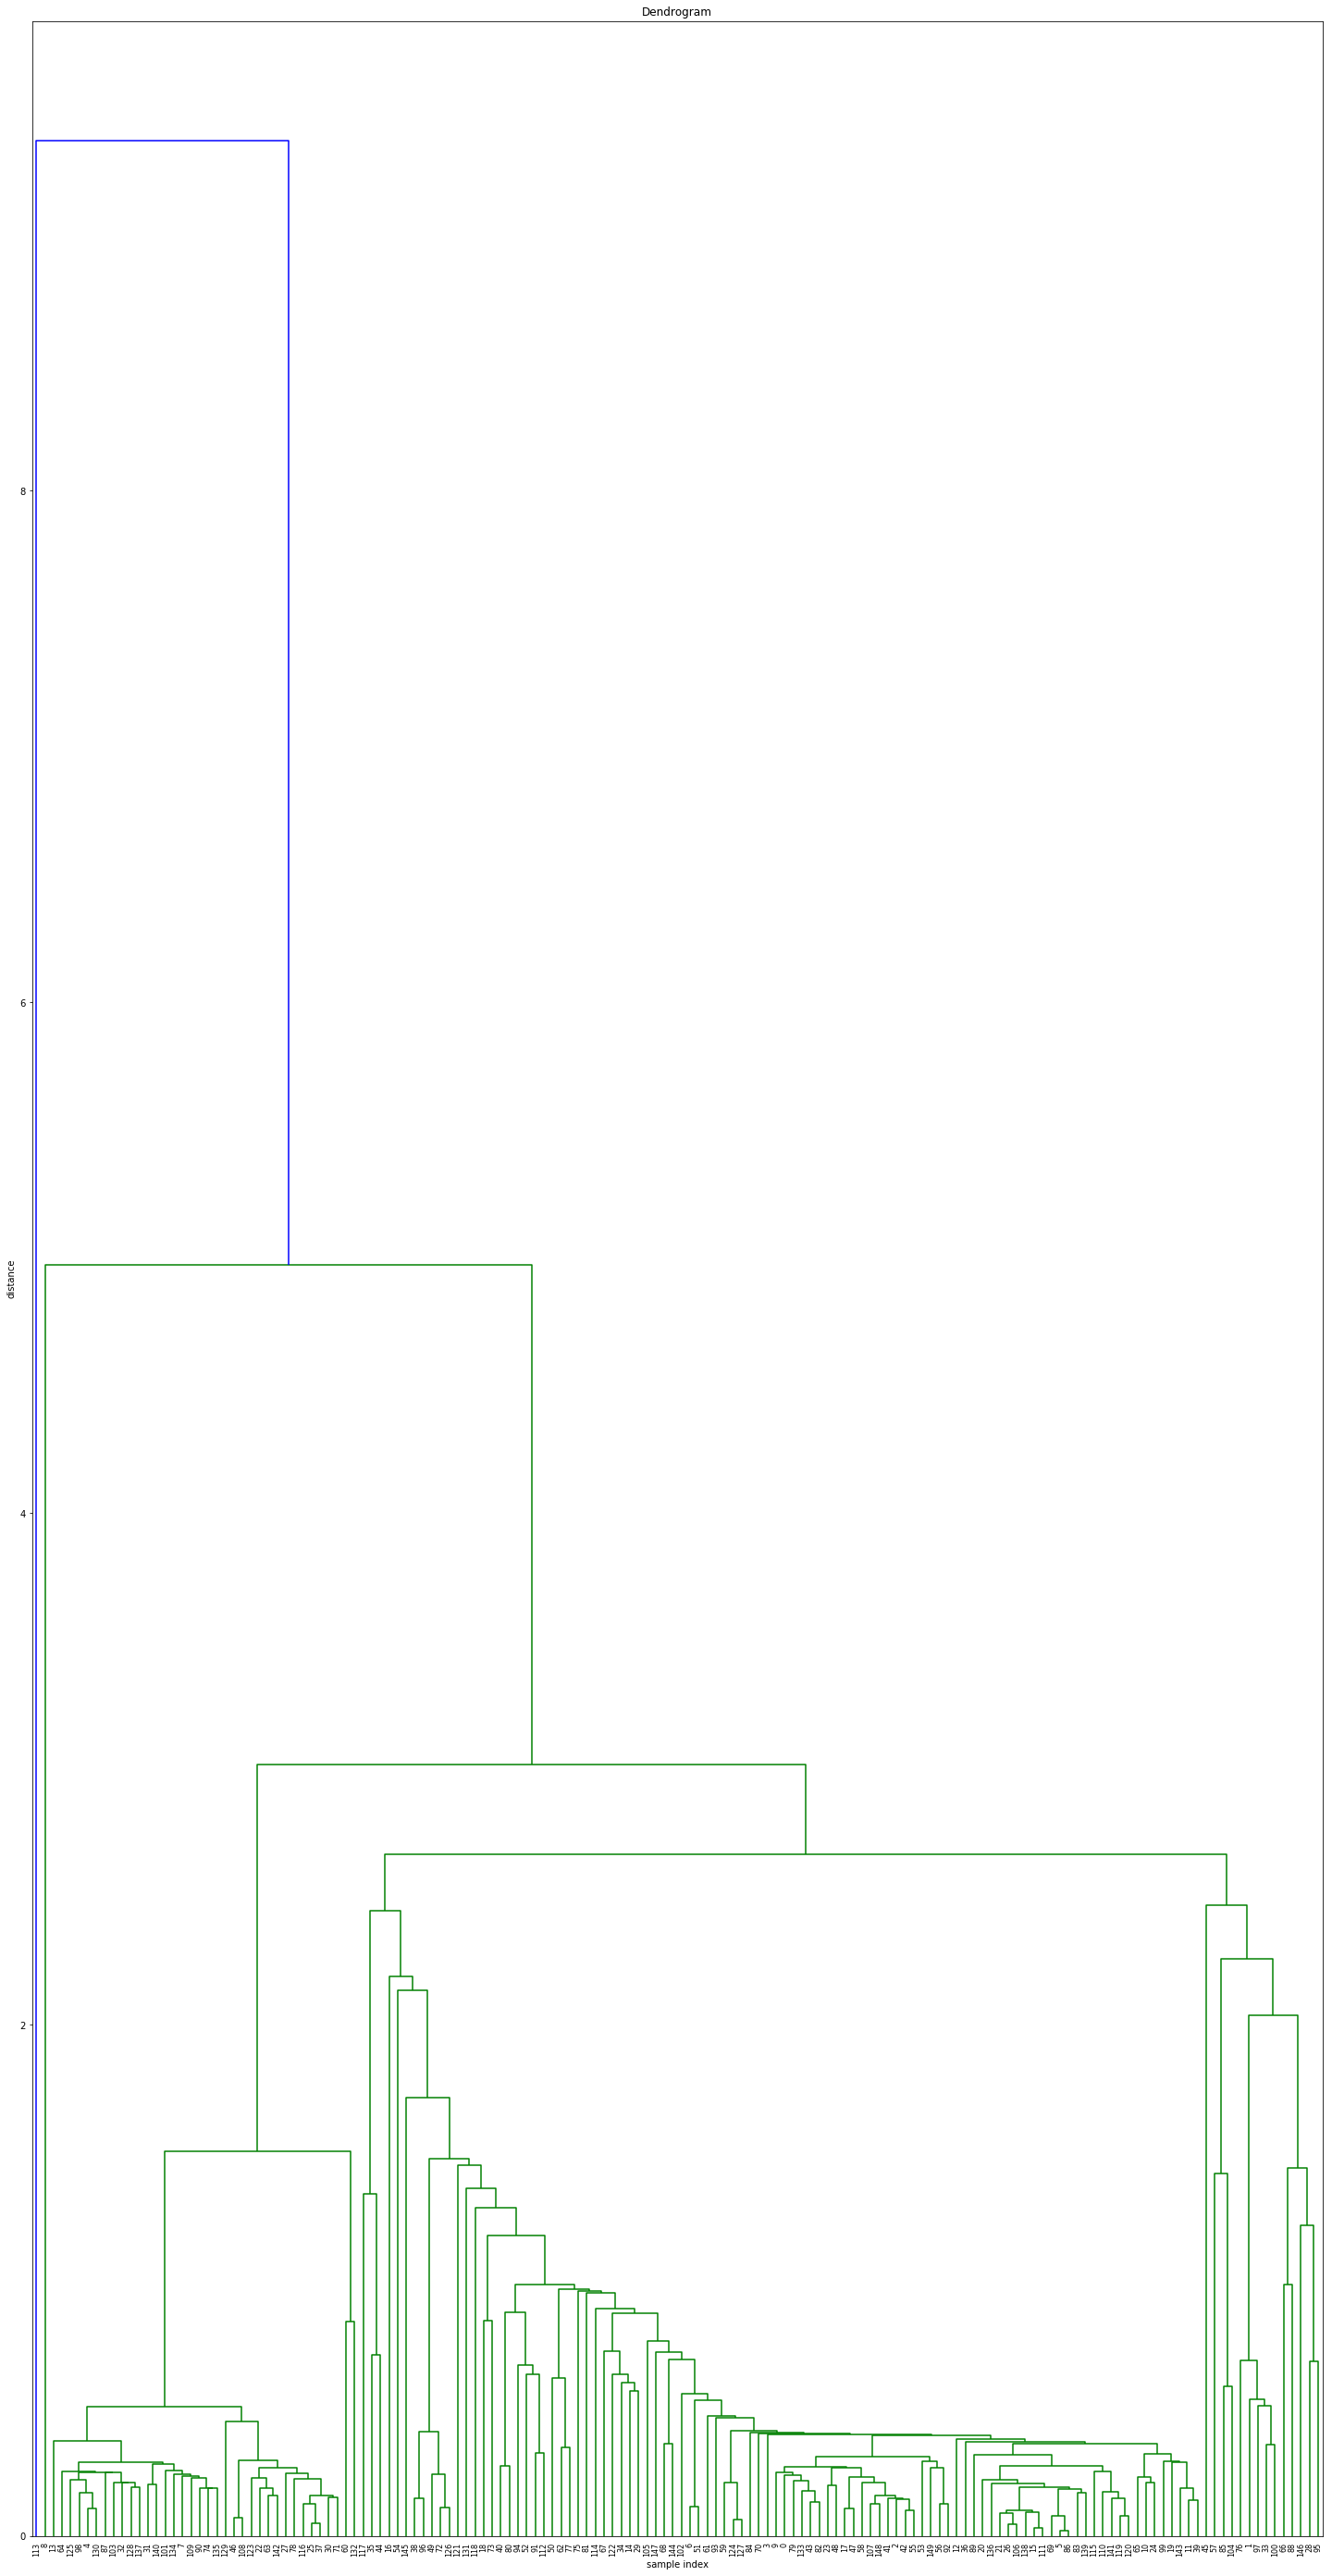

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage 

linked = linkage(train_data_X[:150], 'single')

plt.figure(figsize=(25, 50))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linked,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Dendrogram')
plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
predictions = cluster.fit_predict(train_data_X[:10000])

class_mapping = []
purity = []
print('Count of actual labels in each cluster:')
for i in range(k):
    indexes = []
    for j in range(len(X)):
        if labels[j] == i:
            indexes.append(j)
    actual = train_data_Y[indexes]
    actual = np.array(actual)
    unique, counts = np.unique(actual, return_counts=True)
    print unique, counts
    max_count = 0
    majority_index = 0
    for m in range(len(counts)):
        if counts[m] > max_count:
            max_count = counts[m]
            majority_index = m
    class_mapping.append( unique[majority_index] )
    purity.append( float(max_count)/len(indexes) )
print('\nPurity of each cluster:')
print (purity)
HC_avg_purity = float(np.mean(purity))

Count of actual labels in each cluster:
['dos'] [7505]
['normal'] [8]
['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 942 3763 2214  145    7]
['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 667 9593   98   52    3]
['probe'] [1]

Purity of each cluster:
[1.0, 1.0, 0.5321736670909348, 0.9212522808028426, 1.0]


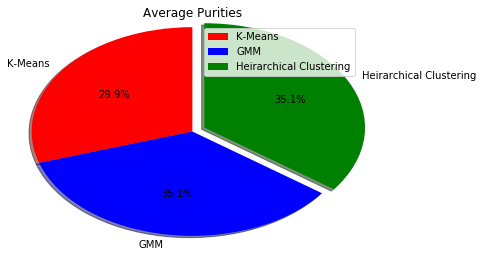

In [78]:
algo = ['K-Means', 'GMM', 'Heirarchical Clustering'] 
slices = [Kmeans_avg_purity, GMM_avg_purity, HC_avg_purity] 
colors = ['r', 'b', 'g']
plt.pie(slices, labels = algo, colors=colors,  
        startangle=90, shadow = True, explode = (0, 0, 0.1), 
        radius = 1.2, autopct = '%1.1f%%') 
plt.title('Average Purities')
plt.legend()
plt.show()

# Part 5
## PCA on categorical data

PCA basically works if you have representation of your data as vector in Rn.

Therefore, you cannot trivially apply PCA to categorical data because there is no significance of varaice and covariance for categorical data. 
However, some workarounds or tricks exist:
    If you have a similarity measure between your data, you can use MDS (multi dimensional scaling) which is, in some sense, analogous to PCA but which only requires a similarity matrix between your data to be performed.
    Use kernels to (implicitly) embed your data in a Hilbert space which is basically to build a function K:(xi,xj)->K(xi,xj) which verifies some properties and which then behave as if you have found an embedding φ of your data in a Hilbert space (which you do not need to know explicitely, neither the space nor the embedding, You just need K). That is, K(xi,xj)=(φ(xi)|φ(xj)). And with the Kernel Trick, you can perform (an adaptation of) PCA on your data.